In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#reading the csv file as a link to github
url = 'https://raw.githubusercontent.com/adwait1291/try/main/Suspicious%20Communication%20on%20Social%20Platforms.csv'
df = pd.read_csv(url)

#looking at the first five rows using .head() function
df.head()

#importing natural language Toolkit - A tool to preprocesses/clean text 
import nltk

In [2]:
#Checking that the latest nltk version is installed in the users local computer 
#Warning: install all the libraries required for this project
nltk.__version__

'3.2.4'

# Preprocessing

In [3]:
df.shape

(20001, 2)

In [4]:
#converting all missing values in tagging column into NaN
#example: converting None,NotAvailable,ValueMissing,etc into Nan
df=df[pd.to_numeric(df['tagging'], errors='coerce').notnull()]

In [5]:
#Droping all rows that contain Nan value 
df = df.dropna(axis=0)

In [6]:
#Since the shape is the same there are no missing valus in our dataset
df.shape

(20001, 2)

In [7]:
import string
from nltk import pos_tag#pos_tag is a tool that tags the part of speech to the word(POS = Part of Speech)
#example: tagging the word 'drinking' as verb

#function for removing punctuations
def tokenize_remove_punctuation(text):
  clean_text = []         #creaating an empty list to store the cleaned text
  text = text.split(" ")  #spliting all words in a sentence separated by " " and storing them in a list named 'text'
  for word in text:
    word = list(word)  #spliting all words into alphabets
    new_word = []      #creaating an empty list to store the new word after removing puntuations
    
    # spliting the words into alphabets is used because it will convert words like 'reading?' into 'reading'
    for c in word:
      if c not in string.punctuation:     #string.puntuation is a list og all puntuation marks , example :@!$%&?, etc.
        new_word.append(c)
      word = "".join(new_word)  #joing the alphabets to create the word after removing all puntuations
    clean_text.append(word)     #storing the word in the list named 'clean_text' to create the list of words in the sentence
  return clean_text


In [8]:
# using a sample sentence to see whether the funtion works well or not 
# NOTE: We have only created the functions till now. We haven't done anythong with our dataset till now.
trial_text = tokenize_remove_punctuation("hello @anyone reading? wt is the name of am in that this  ??!@")
trial_text

['hello',
 'anyone',
 'reading',
 'wt',
 'is',
 'the',
 'name',
 'of',
 'am',
 'in',
 'that',
 'this',
 [],
 '']

In [9]:
import nltk
#downloads the list of stopwords
nltk.download('stopwords')

#'stopwords' is a list of words that have nearly no value in the sentence
#example : 'I am a boy' is converted into 'boy'
#here words like 'I', 'am', 'a' ;these words have very less comtribution to the sentence

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
#storing all the stopwords in the list named 'stopwords' 
stopwords = nltk.corpus.stopwords.words('english')  #storing only english stopwords , there are stopwords for other language also such as chinese and french

# Function to remove all the stopwords from the sentence
def remove_stopwords(text):
  clean_text = []
  for word in text:
    if word not in stopwords:
      clean_text.append(word)
  return clean_text

In [11]:
# using a sample sentence to see whether the funtion works well or not
remove_stopwords(trial_text)

['hello', 'anyone', 'reading', 'wt', 'name', [], '']

In [12]:
#tagging all the words according o their part of speech
def pos_tagging(text):
    try:
        tagged = nltk.pos_tag(text)
        return tagged
    except Excepton as e:
        print(e)

In [13]:
from nltk.corpus import wordnet

#wordnet is a tool that reads that reads the tagging and returns the part of speech 
def get_wordnet(pos_tag):
  if pos_tag.startswith('J'):
    return wordnet.ADJ
  elif pos_tag.startswith('V'):
    return wordnet.VERB
  elif pos_tag.startswith('N'):
    return wordnet.NOUN
  elif pos_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [14]:
from nltk.stem import WordNetLemmatizer
#WordLemmatizer is a tool that converts word into root word
#Example: historical(word) is converted into history(root-word)

#Now we will create a function that uses all the functions that we have created above

def clean_text(text):
  text = str(text)
  #Converting text to lower-case
  text = text.lower()
  #tokenize and remove punctuations from the text
  text = tokenize_remove_punctuation(text)
  #remove words containing numericals
  text = [word for word in text if not any(c.isdigit() for c in word)]
  #remove stopwords
  text = remove_stopwords(text)
  #remove empty tokens
  text = [ t for t in text if len(t) > 0]
  #pos tagging
  pos_tags = pos_tagging(text)
  #Lemmatize text
  text = [WordNetLemmatizer().lemmatize(t[0],get_wordnet(t[1])) for t in pos_tags]
  #remove words with only one letter
  text = [ t for t in text if len(t)>1]
  #join all words
  text = " ".join(text)
  return text

In [15]:
#don't know what is 'averaged_perceptron_tagger'
#don't know why devansh downloaded it 
nltk.download('averaged_perceptron_tagger')

#Downloading the wordnet tool
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:

# using a sample sentence to see whether the funtion works well or not
clean_text("What is y0ur name? THis is a cat!! 12?")

'name cat'

<AxesSubplot:title={'center':'Ratio of observations'}>

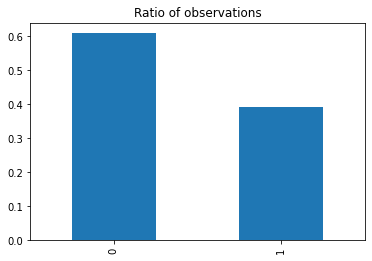

In [17]:
df['tagging'].value_counts(normalize=True).plot(kind='bar', title='Ratio of observations')
#ploting number of '1' and '0' in the 'tagging' colomn of the dataset

#As we can see the difference in number of '1' and '0' is not very large hence we call it as a balanced dataset 
#NOTE:It's very important to provide a balanced dataset for creating the model

In [18]:
#This line code converts floating numericals into integer numeric
#example: converting 1.0, 1.00, etc into integer 1
#example: converting 0.0, 0.00, etc into integer 0

df['tagging']=df['tagging'].astype(str).astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  20001 non-null  object
 1   tagging   20001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.8+ KB


In [20]:
df.shape

(20001, 2)

In [21]:
#reseting the index of rows
# Index gets unordered if we drop some rows in our dataset(Example while using dropna() function)
df.reset_index(inplace = True, drop = True)

In [22]:
#this line of code will now be used to pply the functions on each sentences in the 'comments' column
#This will take time as it will use the 'clean_text' function on all the sentences in our dataset
#the .map() function applies the function at each sentences in the 'comments' column
df['Processed_Comment'] = df['comments'].map(clean_text)

In [23]:
#Splitting dataset for training and testing(80:20)

from sklearn.model_selection import train_test_split
#train_test_split is a funtion that splits dataset into two parts 
#80%(for training the model) and 20%(for testing the model)
#This function returns 4 values 
# 1 'Processed_comment' for training
# 2 'Processed_comment' for testing
# 3 'tagging' for training
# 3 'tagging' for testing
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Comment'], 
                                                    df['tagging'], 
                                                    random_state=42,test_size=0.20)

#random state is used to shuffle the dataset
#test_size=0.20 means that 20% of the dataset is to be allocated for testing of the model

In [1]:
#Creating a bag of words from training data
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vector = CountVectorizer()
X_train = count_vector.fit_transform(X_train)
X_test = count_vector.transform(X_test)

#vectorizing means giving value to the words in the sentence according to a formula
#This value tells us how much the word contributes in the sentence to be a cyberbulling comment 
#I guess this returns a table

KeyboardInterrupt: 

In [25]:
#gives the number of columns in the vectorized table 
len(count_vector.vocabulary_)

13816

In [26]:
#Importing all the terms by which we get accuracy of our model
#NOTE:we haven't trained our model yet 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
#creates a confusion matrix
from sklearn.metrics import confusion_matrix
data =[] #Empty list created to add the accuracy terms of each model that we are going to train 

In [27]:
#importing all empty models
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

#GridSearchCV is a funtion which uses maths to find out the parameters for our dataset
from sklearn.model_selection import GridSearchCV

In [28]:
#Creating a dictionary of all the possible parameters of each ML model
model_params = {
    'LinearSVC': {
        'model': LinearSVC(max_iter=1000000,random_state=42),
        'params' : {
            'C': [0.1,1,5,10,20],
        }  
    },
    'MultinomialNB': {
        'model': MultinomialNB(),
        'params' : {
            'alpha': np.linspace(0.5, 1.5, 6),
            'fit_prior': [True, False],
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(random_state=42, multi_class='ovr',max_iter=1000000),
        'params': {
            'C': [1,5,10],
            'solver': ['newton-cg', 'lbfgs', 'liblinear'],
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(p=2 ),
        'params' : {
            'n_neighbors': [5,9,11,23],
              'weights' : ['uniform', 'distance'],
              'metric' : ['euclidean', 'manhattan', 'minkowski'],
        }
    }
}

In [29]:
#Creating a list to store the best paramters
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False) #Storing the GridSearchCV tool in 'clf'
    clf.fit(X_train, y_train)  #giving the training data to the GridSearchCV tool
    #storing the values in 'score' list
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
#Creating a table of the best parameters
    df4 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df4

,model,best_score,best_params
0,LinearSVC,0.830562,{'C': 1}
1,MultinomialNB,0.765375,"{'alpha': 0.5, 'fit_prior': True}"
2,logistic_regression,0.832188,"{'C': 10, 'solver': 'newton-cg'}"
3,KNeighborsClassifier,0.782563,"{'metric': 'euclidean', 'n_neighbors': 23, 'we..."


# KNN

In [30]:
#storing the empty KNN model in 'model1' with the best parameters provided by GridSearchCV
model1= KNeighborsClassifier(n_neighbors=23, metric='euclidean',weights = 'distance')  
#Training the empty model with our training dataset
model1.fit(X_train, y_train)  

KNeighborsClassifier(metric='euclidean', n_neighbors=23, weights='distance')

In [31]:
#Checking the accuracy of our trained model with the testing dataset
predictions_test = model1.predict(X_test)
predictions_train = model1.predict(X_train)

# Creating a temp list to store the accuracy terms 
#This temp list will later be stored in the 'data' list which will be used to compared the accuracy of each ML models in the summary 
temp = ['KNeighborsClassifier']
temp.append(accuracy_score(predictions_train,y_train))  #accuracy_score  for training data 
temp.append(recall_score(predictions_train,y_train))    #recall_score    for training data
temp.append(f1_score(predictions_train,y_train))        #f1_score        for training data
temp.append(precision_score(predictions_train,y_train)) #precision_score for training data
temp.append(accuracy_score(predictions_test,y_test))    #accuracy_score  for testing data
temp.append(recall_score(predictions_test,y_test))      #recall_score    for testing data
temp.append(f1_score(predictions_test,y_test))          #f1_score        for testing data
temp.append(precision_score(predictions_test,y_test))   #precision_score for testing data

#Storing all the accuracy terms in 'data' list
data.append(temp)

In [32]:
#Creating confusion matrix of our model
confusion = confusion_matrix(predictions_test,y_test)
print(confusion)

[[1678   80]
 [ 746 1497]]


# Logistic Regression

In [33]:
#Same we do for Logistic Regression model and store the accuracy terms in 'data' list
model2 = LogisticRegression(C=10, random_state=42, solver='lbfgs', multi_class='ovr',max_iter=1000000)
model2.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000000, multi_class='ovr', random_state=42)

In [34]:
predictions_test = model2.predict(X_test)
predictions_train = model2.predict(X_train)
temp = ['LogisticRegression']
temp.append(accuracy_score(predictions_train,y_train))
temp.append(recall_score(predictions_train,y_train))
temp.append(f1_score(predictions_train,y_train))
temp.append(precision_score(predictions_train,y_train))
temp.append(accuracy_score(predictions_test,y_test))
temp.append(recall_score(predictions_test,y_test))
temp.append(f1_score(predictions_test,y_test))
temp.append(precision_score(predictions_test,y_test))
data.append(temp)

In [35]:
confusion = confusion_matrix(predictions_test,y_test)
print(confusion)

[[1983  163]
 [ 441 1414]]


# Naive Bayes

In [36]:
#Same we do for Navie Bayes model and store the accuracy terms in 'data' list
model3 = MultinomialNB(alpha = 0.5, fit_prior = 'True')
model3.fit(X_train, y_train)

MultinomialNB(alpha=0.5, fit_prior='True')

In [37]:
predictions_test = model3.predict(X_test)
predictions_train = model3.predict(X_train)
temp = ['MultinomialNB']
temp.append(accuracy_score(predictions_train,y_train))
temp.append(recall_score(predictions_train,y_train))
temp.append(f1_score(predictions_train,y_train))
temp.append(precision_score(predictions_train,y_train))
temp.append(accuracy_score(predictions_test,y_test))
temp.append(recall_score(predictions_test,y_test))
temp.append(f1_score(predictions_test,y_test))
temp.append(precision_score(predictions_test,y_test))
data.append(temp)

In [38]:
confusion = confusion_matrix(predictions_test,y_test)
print(confusion)

[[1986  370]
 [ 438 1207]]


# Linear SVC

In [39]:
#Same we do for Linear SVC model and store the accuracy terms in 'data' list
model4 = LinearSVC(C = 1, max_iter=1000000,random_state=42)
model4.fit(X_train, y_train)

LinearSVC(C=1, max_iter=1000000, random_state=42)

In [40]:
predictions_test = model4.predict(X_test)
predictions_train = model4.predict(X_train)
temp = ['LinearSVC']
temp.append(accuracy_score(predictions_train,y_train))
temp.append(recall_score(predictions_train,y_train))
temp.append(f1_score(predictions_train,y_train))
temp.append(precision_score(predictions_train,y_train))
temp.append(accuracy_score(predictions_test,y_test))
temp.append(recall_score(predictions_test,y_test))
temp.append(f1_score(predictions_test,y_test))
temp.append(precision_score(predictions_test,y_test))
data.append(temp)

In [41]:
confusion = confusion_matrix(predictions_test,y_test)
print(confusion)

[[1967  162]
 [ 457 1415]]


# Summary

In [42]:
#Creating a table of all accuracy terms of each trained ML models
result = pd.DataFrame(data, columns = ['Algorithm','Accuracy Score : Train', 'Recall Score : Train','F1-Score :Train','Precision Score :Train','Accuracy Score : Test', 'Recall Score : Test','F1-Score : Test','Precision Score : Test'])
result.reset_index(drop=True, inplace=True)

In [43]:
result

,Algorithm,Accuracy Score : Train,Recall Score : Train,F1-Score :Train,Precision Score :Train,Accuracy Score : Test,Recall Score : Test,F1-Score : Test,Precision Score : Test
0,KNeighborsClassifier,0.993625,0.989482,0.991853,0.994235,0.793552,0.667410,0.783770,0.949271
1,LogisticRegression,0.964187,0.956683,0.953994,0.951321,0.849038,0.762264,0.824009,0.896639
2,MultinomialNB,0.893938,0.873767,0.862357,0.851241,0.798050,0.733739,0.749224,0.765377
3,LinearSVC,0.963938,0.954750,0.953755,0.952762,0.845289,0.755876,0.820528,0.897273


# Saving models in .pkl file

In [44]:
import pickle
#pickle is a tool to create .pkl files 
#These .pkl files are trained models which will be used to predict the input text is a cyberbulling or not 

In [45]:
#This is a vectorizer pkl file which will convert the input from the user to a cleaned an vectorized text  
pickle_out = open("vectorizer.pkl","wb")
pickle.dump(count_vector, pickle_out)
pickle_out.close()

In [46]:
#Saves the trained LinearSVC model
pickle_out = open("LinearSVC.pkl","wb")
pickle.dump(model4, pickle_out)
pickle_out.close()

In [47]:
#Saves the trained Naive Bayes model
pickle_out = open("MultinomialNB.pkl","wb")
pickle.dump(model3, pickle_out)
pickle_out.close()

In [48]:
#Saves the trained Logistic Regression model
pickle_out = open("LogisticRegression.pkl","wb")
pickle.dump(model2, pickle_out)
pickle_out.close()

In [49]:
#Saves the trained KNN model
pickle_out = open("KNeighborsClassifier.pkl","wb")
pickle.dump(model1, pickle_out)
pickle_out.close()